In [38]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [39]:
dataset = 'dataset.csv'
model_save_path = 'pose_detector.keras'
model_save_name = 'pose_detector'
model_tflite_name = 'pose_detector.tflite'

In [40]:
NUM_CLASSES = 6

In [41]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(2, 10 + 1)))

In [42]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [43]:
# y_dataset = y_dataset - 1

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.80, random_state=RANDOM_SEED)

# Model building

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [46]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476 (1.86 KB)

 Trainable params: 476 (1.86 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Model checkpoint callback
# path_model = os.path.dirname(model_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path, verbose=1, save_weights_only=False
)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=100, verbose=1)

In [48]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [49]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
917/937 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2921 - loss: 3.4096
Epoch 1: saving model to pose_detector.keras
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2937 - loss: 3.3796 - val_accuracy: 0.6783 - val_loss: 1.0812
Epoch 2/1000
921/937 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5029 - loss: 1.2797
Epoch 2: saving model to pose_detector.keras
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5033 - loss: 1.2788 - val_accuracy: 0.7926 - val_loss: 0.8598
Epoch 3/1000
933/937 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5598 - loss: 1.1325
Epoch 3: saving model to pose_detector.keras
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5599 - loss: 1.1324 - val_accuracy: 0.7895 - val_loss: 0.8247
Epoch 4/1000
931/937 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5855 - loss: 1.0725
Epoch 4: saving model to pose_detector.keras
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5855 - loss: 1.0724 - val_accuracy: 0.7934 - val_loss: 0.7628


In [50]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7233 - loss: 0.7676


In [51]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [52]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[2.1556512e-01 7.1157759e-01 7.1356699e-02 2.2337877e-17 9.2062663e-07
 1.4997247e-03]
1


# Save Model to TFfile

In [53]:
model.export(model_save_name)

INFO:tensorflow:Assets written to: pose_detector/assets


INFO:tensorflow:Assets written to: pose_detector/assets


Saved artifact at 'pose_detector'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  140336112585360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140337324007920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140336112030240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140336112030064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140336112033584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140336112033232: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [54]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_save_name)
tflite_model = converter.convert()

W0000 00:00:1739095077.493443   52366 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1739095077.493467   52366 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-02-09 17:57:57.493667: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: pose_detector
2025-02-09 17:57:57.494322: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-02-09 17:57:57.494335: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: pose_detector
2025-02-09 17:57:57.498577: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-02-09 17:57:57.519286: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: pose_detector
2025-02-09 17:57:57.526382: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 32720 microseconds.


In [55]:
with open(model_tflite_name, 'wb') as f:
    f.write(tflite_model)

# Confussion Matrix

937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step


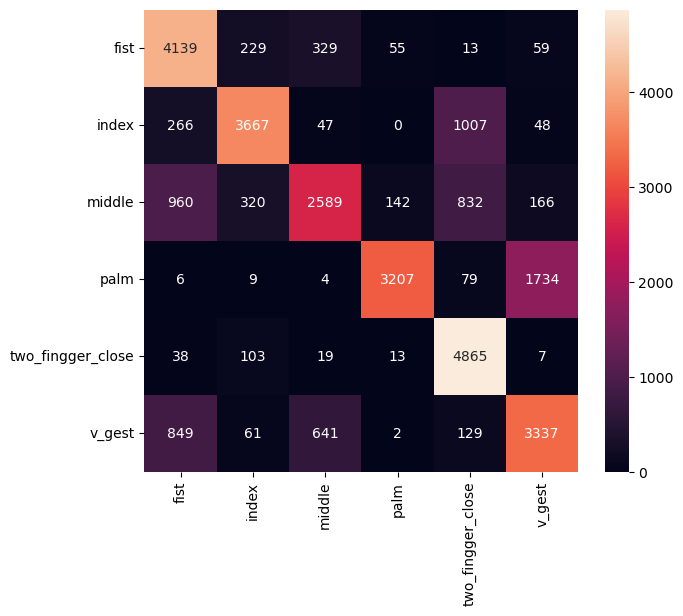

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.86      0.75      4824
           1       0.84      0.73      0.78      5035
           2       0.71      0.52      0.60      5009
           3       0.94      0.64      0.76      5039
           4       0.70      0.96      0.81      5045
           5       0.62      0.66      0.64      5019

    accuracy                           0.73     29971
   macro avg       0.75      0.73      0.72     29971
weighted avg       0.75      0.73      0.72     29971



In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    label_name = ['fist', 'index', 'middle', 'palm', 'two_fingger_close', 'v_gest']
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=label_name, columns=label_name)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)